In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df1 = pd.read_excel("/Users/haleyk/Documents/RoboDK/Python_Libraries_for_RoboDK/RoboDK.xlsx")
df1

,Brand,Model,Axes,Reach (mm),Payload (kg),Weight (kg),Repeatability (mm)
0,Fanuc,LR Mate 200iC/5H,5,704,5,28,0.02
1,Kawasaki,RD80N,5,2100,80,555,0.07
2,KUKA,KR 1000 L950 titan PA,5,3601,950,4740,0.2
3,KUKA,KR 1000 L1300 titan PA,5,3202,1300,4690,0.2
4,KUKA,youBot,5,901,10,52,0.03
...,...,...,...,...,...,...,...
692,Yaskawa Motoman,UP20,6,1658,20,280,0.06
693,Yaskawa Motoman,UP20M,6,3106,20,495,0.15
694,Yaskawa Motoman,UP50N,6,2046,50,550,0.07
695,Yaskawa Motoman,UP200,6,2446,200,1350,0.2


In [38]:
df1['Reach (mm)'].head()

0     704
1    2100
2    3601
3    3202
4     901
Name: Reach (mm), dtype: object

In [39]:
df1.columns

Index(['Brand ', 'Model ', 'Axes ', 'Reach (mm)', 'Payload (kg)',
       'Weight (kg)', 'Repeatability (mm)'],
      dtype='object')

In [40]:
df1.groupby('Brand ')['Brand '].count()

Brand 
ABB                  69
AUBO                  3
Adept                 4
Agilebot              1
Annin Robotics        3
Automata              1
BORUNTE               1
CLOOS                 1
CPR                   1
CRS                   2
Comau                26
Denso                 9
Dobot                 4
Doosan                8
ESI                   2
Efort                 2
Elibot                3
Epson                10
Estun                 3
Fanuc                72
Fanuc                 1
Foxbot                2
Franka                1
Fruitcore             1
GMF                   1
GSK                   9
HIWIN                 7
HSR                   2
Han's                 6
Hanwha                3
Hyundai Robotics     12
Jaka                  9
KUKA                131
Kawasaki             41
Kinova                4
Leantec              13
Mecademic             1
Mitsubishi           30
Nachi                19
Niryo                 1
OTC Daihen           10
Omron    

In [41]:
df2 = df1.fillna('0')
df2

,Brand,Model,Axes,Reach (mm),Payload (kg),Weight (kg),Repeatability (mm)
0,Fanuc,LR Mate 200iC/5H,5,704,5,28,0.02
1,Kawasaki,RD80N,5,2100,80,555,0.07
2,KUKA,KR 1000 L950 titan PA,5,3601,950,4740,0.2
3,KUKA,KR 1000 L1300 titan PA,5,3202,1300,4690,0.2
4,KUKA,youBot,5,901,10,52,0.03
...,...,...,...,...,...,...,...
692,Yaskawa Motoman,UP20,6,1658,20,280,0.06
693,Yaskawa Motoman,UP20M,6,3106,20,495,0.15
694,Yaskawa Motoman,UP50N,6,2046,50,550,0.07
695,Yaskawa Motoman,UP200,6,2446,200,1350,0.2


In [42]:
X = df2.iloc[:, [3,6]].values

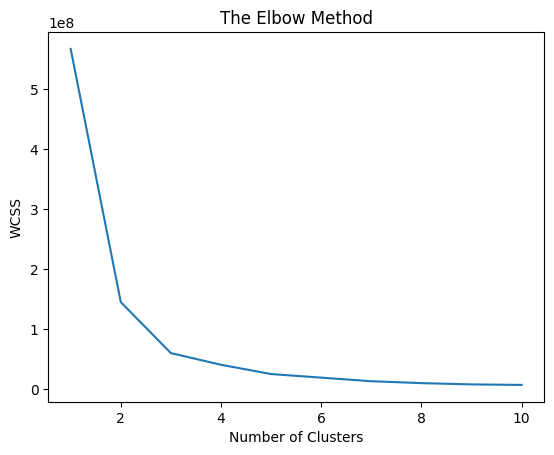

In [43]:
from sklearn.cluster import KMeans 
wcss_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state = 50)  
y_predict= kmeans.fit_predict(X)  

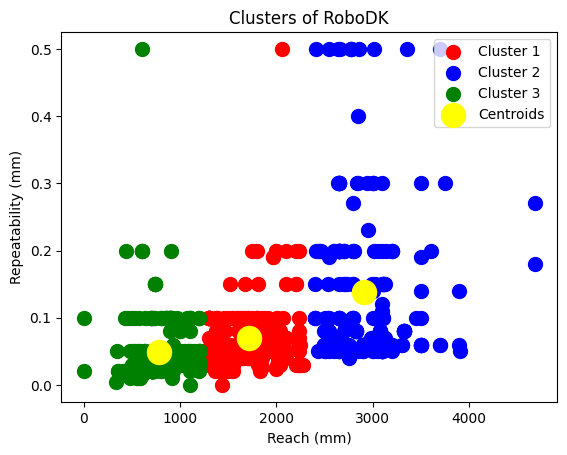

In [46]:
# Visualising the clusters
plt.scatter(X[y_predict == 0,0], X[y_predict == 0,1], s = 100, c ='red', label ='Cluster 1')
plt.scatter(X[y_predict == 1,0], X[y_predict == 1,1], s = 100, c ='blue', label ='Cluster 2')
plt.scatter(X[y_predict == 2,0], X[y_predict == 2,1], s = 100, c ='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('Clusters of RoboDK')
plt.xlabel('Reach (mm)')
plt.ylabel('Repeatability (mm)')
plt.legend()
plt.show()